## Naive Bays Classifier

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudbasnet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Model Code

In [17]:
class Multinomial_NB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, Y):
        self.classes = np.unique(Y, return_counts=True)
        V = X.shape[1]
        self.pi = np.zeros(shape=len(self.classes[0]))
        for i in range(len(self.classes[0])):
            self.pi[i] = (self.classes[1][i] + 1.0)/(len(Y) + len(self.classes[0]))
        
        self.theta = np.zeros(shape=(self.pi.shape[0], X.shape[1]))
        self.class_prob = np.zeros(shape=(self.pi.shape[0], X.shape[1]))
        
        for c in range(len(self.classes[0])):
            X_c = X[np.nonzero(Y == self.classes[0][c])]
            M_jc = X_c.sum(axis=0)
            M_c = M_jc.sum()
            for j in range(X.shape[1]):
                self.theta[c][j] = (M_jc[ j] + self.alpha)/(M_c + V + 1.0)           
                self.class_prob[c][j] = self.theta[c][j] * self.pi[c]

    def predict(self, X):
        pred = self.predict_log_proba(X)
        y_predicted = np.zeros(shape=(len(X)))
        for i in range(len(X)):
            y_predicted[i] = self.classes[0][np.argmax(pred[i])]
        return y_predicted
    
    def predict_proba(self, X):
        results = np.zeros(shape=(X.shape[0], len(self.pi)))
        for c in range(len(self.classes[0])):
            for i in range(X.shape[0]):
                prod = 1
                for j in range(X.shape[1]):
                    prod *= self.theta[c, j] ** X[i, j]
                results[i, c] = self.pi[c] * prod
        return results
    
    def predict_log_proba(self, X):
        results = np.zeros(shape=(X.shape[0], len(self.pi)))
        for c in range(len(self.classes[0])):
            for i in range(X.shape[0]):
                summ = 0
                for j in range(X.shape[1]):
                    summ += np.log(self.theta[c, j] ** X[i, j])
                results[i, c] = np.log(self.pi[c]) + summ
        return results


#### Exploratory Data Analysis

In [3]:
df = pd.read_csv('./data/SMSSpamCollection.csv', header=None)
df.columns = ['spam', 'sms']
# changing spam to 1 and ham to 0
df['spam'] = df['spam'].map(lambda x: 1 if x=='spam' else 0)

# 3
df.describe()

,spam
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
df.groupby('spam').count()

,sms
spam,
0,4827
1,747


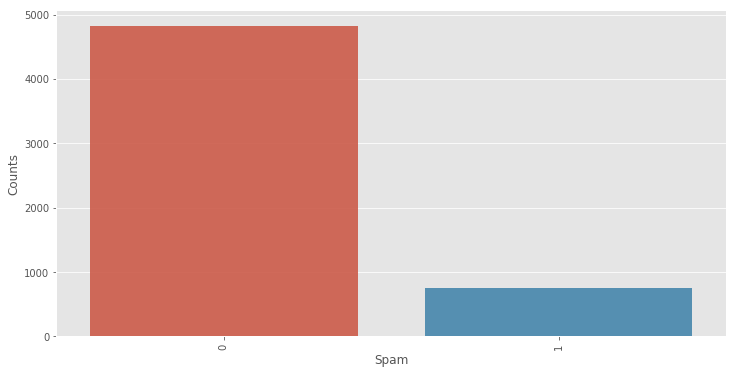

In [5]:
import seaborn as sns

label_counts = df.spam.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [6]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

df['sms_lemmatized'] = df['sms'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))
df['sms_stemmized'] = df['sms'].map(lambda text: ' '.join(stemmer.stem(w) for w in nltk.word_tokenize(text.lower())))

Spam


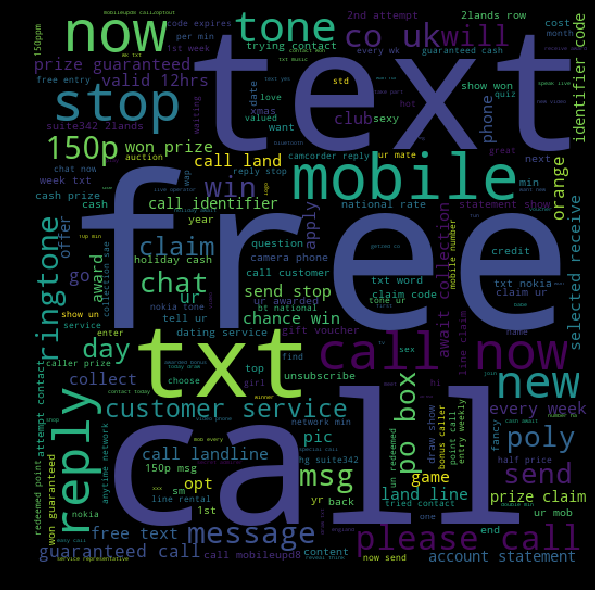

In [7]:
spam_words = ''.join(list(df[df['spam']==1]['sms_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)

print("Spam")

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Ham


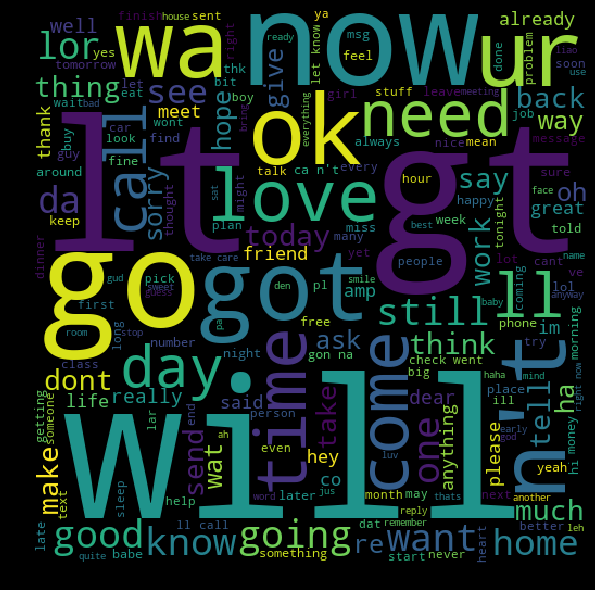

In [8]:
spam_words = ''.join(list(df[df['spam']==0]['sms_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)

print("Ham")

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [9]:
count_vect = CountVectorizer(lowercase=True, stop_words='english')

df = df.sample(frac=1) 

sms = df['sms_lemmatized']
y = df['spam']

X_counts = count_vect.fit_transform(sms).todense()

print('feature names:')
print(count_vect.get_feature_names())

feature names:
['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '0870

In [10]:
print("\nVocabulary: ", count_vect.vocabulary_)


Vocabulary:  {'jason': 3963, 'say': 6134, 'cool': 2132, 'pick': 5375, 'place': 5403, 'like': 4287, 'hour': 3670, 'hey': 3576, 'sexy': 6249, 'bun': 1675, 'told': 7158, 'adore': 934, 'loverboy': 4405, 'hope': 3647, 'remember': 5887, 'thank': 7022, 'sister': 6392, 'law': 4219, 'meatball': 4591, 'grins': 3397, 'love': 4399, 'babe': 1298, 'home': 3629, 'hurry': 3714, 'big': 1457, 'butt': 1693, 'hang': 3476, 'caller': 1731, 'food': 3076, 'starving': 6666, 'ask': 1194, 'cooked': 2129, 'xam': 7854, 'hall': 3461, 'boy': 1582, 'asked': 1196, 'girl': 3290, 'tell': 6974, 'starting': 6664, 'term': 6990, 'dis': 2485, 'answer': 1084, 'den': 2380, 'manage': 4512, 'lot': 4386, 'hesitation': 3574, 'lookin': 4370, 'silently': 6370, 'said': 6083, 'intha': 3877, 'ponnungale': 5479, 'ipaditan': 3897, 'slave': 6422, 'want': 7603, 'picture': 5380, 'today': 7149, 'bright': 1619, 'light': 4283, 'cell': 1819, 'phone': 5362, 'nope': 4985, 'talk': 6916, 'make': 4502, 'greet': 3393, 'watch': 7623, 'shrek': 6341, '

In [11]:
def partition(feature_arr, target_arr, t=0.2):
    nrows = int(np.floor((1-t) * feature_arr.shape[0]))
    X_train, X_test  = np.array(feature_arr[:nrows]), np.array(feature_arr[nrows:])
    y_train, y_test = np.array(target_arr[:nrows]), np.array(target_arr[nrows:])
    return X_train, X_test, y_train, y_test

#### Model Evaluation

In [12]:
def kFold(folds, data, labels, model, model_args, error_function):
    error = []
    nrows = data.shape[0]
    # we divide the dataset in equal parts. If there are extra rows, we ignore them
    f_size = int(np.floor(nrows/folds))
    data, labels = data[0:(f_size * folds)], labels[0:(f_size * folds)]
    data, labels = np.split(data, folds), np.split(labels, folds)

    expected_labels = np.ndarray([])
    predicted_labels = np.ndarray([])
    
    for fold in range(folds):
        test_created = False
        for i in range(folds):
            if fold == i:
                X_test = data[i]
                y_test = labels[i]
                test_created = True
            else:
                if i==0 or (i == 1 and test_created):
                    X_train = data[i]
                    y_train = labels[i]
                else:
                    X_train = np.append(X_train, data[i], axis=0)
                    y_train = np.append(y_train, labels[i], axis=0)
        # test and train sets have been created
        
        Multi_NB = model(model_args)
        Multi_NB.fit(X_train, y_train)

        y_predicted = Multi_NB.predict(X_test)
        
        expected_labels = np.append(expected_labels, y_test)
        predicted_labels = np.append(predicted_labels, y_predicted)
        
        error.append(error_function(y_predicted, y_test))
        
    return {'expected_labels': expected_labels, 'predicted_labels': predicted_labels, 'average_error': np.mean(error)}

In [13]:
import matplotlib.pyplot as plt

def get_precision(y_pred, y_true):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fp = np.sum(((y_pred-y_true) == 1).astype(np.int))
    return tp/(tp+fp)

def get_recall(y_pred, y_true):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fn = np.sum(((y_true-y_pred) == 1).astype(np.int))
    return tp/(tp+fn)

def get_f1(y_pred, y_true):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fp = np.sum(((y_pred-y_true) == 1).astype(np.int))
    fn = np.sum(((y_true-y_pred) == 1).astype(np.int))
    return tp/(tp+(fn+fp)/2)

def get_cm(y_true, y_pred):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fp = np.sum(((y_pred-y_true) == 1).astype(np.int))
    fn = np.sum(((y_true-y_pred) == 1).astype(np.int))
    tn = np.sum(((y_pred+y_true) == 0).astype(np.int))
    return np.array([[tn, fp], [fn, tp]])

def gen_roc(y_true, y_scores):
    tpr_list = []
    fpr_list = []
    for t in range(0, 2000, 5):
        # manual threshold from 0. to 2., step 0.005
        y_test = (y_scores >= t*0.001).astype(np.int)
        tp = np.sum(((y_test+y_true) == 2).astype(np.int))
        fp = np.sum(((y_test-y_true) == 1).astype(np.int))
        fn = np.sum(((y_true-y_test) == 1).astype(np.int))
        tn = np.sum(((y_test+y_true) == 0).astype(np.int))
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(10, 6))
    plt.plot(fpr_list, tpr_list, color='darkorange', linewidth=8, label=None) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def gen_auc(y_true, y_scores):
    tpr_list = []
    fpr_list = []
    auc = 0.00
    thresholds = range(0, 200, 1)
    for t in thresholds:
        # manual threshold from 0. to 2., step 0.01
        y_test = (y_scores >= t*0.01).astype(np.int)
        tp = np.sum(((y_test+y_true) == 2).astype(np.int))
        fp = np.sum(((y_test-y_true) == 1).astype(np.int))
        fn = np.sum(((y_true-y_test) == 1).astype(np.int))
        tn = np.sum(((y_test+y_true) == 0).astype(np.int))
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    # area of each small trapezoid from ROC
    for i in range(0, len(tpr_list)-1):
        # (left + right) / 2
        base = (tpr_list[i] + tpr_list[i+1]) / 2.0
        # width(or step) on fpr
        width = (fpr_list[i] - fpr_list[i+1])
        auc = auc + base * width
    return auc

In [14]:
X_train, X_test, y_train, y_test = partition(X_counts, y)

In [15]:
# Model selection via Hyper-parameter tuning
evaluation_results = []
col_names =  ['Alpha', 'Average F1 Score']
model_evaluation = pd.DataFrame(columns=col_names)
for alpha in [0.1, 0.5, 1.0, 1.5, 2.0]:
    analysis = kFold(8, X_counts, y, Multinomial_NB, alpha, get_f1)
    tempDF = pd.DataFrame([[alpha, analysis['average_error']]], columns = col_names)
    model_evaluation = model_evaluation.append(tempDF, ignore_index = True)
model_evaluation

,Alpha,Average F1 Score
0,0.1,0.939651
1,0.5,0.937628
2,1.0,0.927308
3,1.5,0.920306
4,2.0,0.915002


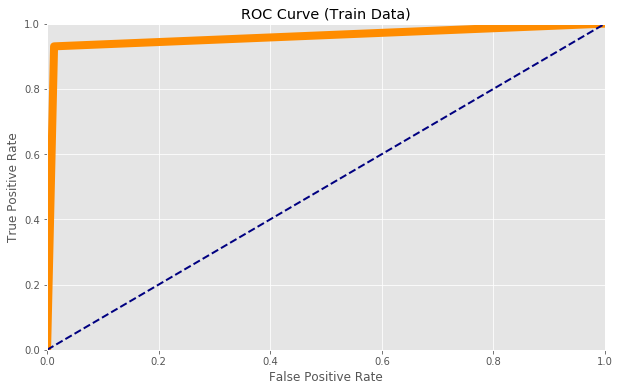

In [18]:
X_train, X_test, y_train, y_test = partition(X_counts, y) 
model = Multinomial_NB(0.1)

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

gen_roc(y_test, y_predicted)

In [19]:
print("AUC", gen_auc(y_true = y_test, y_scores = y_predicted))

AUC 0.9589202809412326


In [20]:
print("f1 score: ", get_f1(y_predicted, y_test))
print("precision: ", get_precision(y_predicted, y_test))
print("recall: ", get_recall(y_predicted, y_test))
print("confusion matrix:\n", get_cm(y_predicted, y_test))

f1 score:  0.9274447949526814
precision:  0.9245283018867925
recall:  0.930379746835443
confusion matrix:
 [[945  11]
 [ 12 147]]
